# Classification with Random Forests

### Imports

In [1]:
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### Load Data

In [2]:
df = pd.read_csv('../../data/01-modified-data/occupations_detailed_(employment_and_wage).csv')

## drop unneeded column created from read_csv
df = df.iloc[:, 1:]

### Separate Predictor and Response Variables

In [3]:
# Y="Target" COLUMN and X="everything else"
X = df.iloc[:, 2:6]
Y = df.iloc[:, 7]

### Normalization

In [4]:
X=0.1+(X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))

### Numerical EDA

In [5]:
df['Target'].value_counts(ascending=True)

Legal Occupations                                              15
Building and Grounds Cleaning and Maintenance Occupations      18
Farming, Fishing, and Forestry Occupations                     24
Community and Social Service Occupations                       26
Healthcare Support Occupations                                 27
Food Preparation and Serving Related Occupations               33
Computer and Mathematical Occupations                          36
Sales and Related Occupations                                  42
Protective Service Occupations                                 43
Arts, Design, Entertainment, Sports, and Media Occupations     55
Business and Financial Operations Occupations                  58
Personal Care and Service Occupations                          60
Architecture and Engineering Occupations                       61
Management Occupations                                         73
Installation, Maintenance, and Repair Occupations              75
Life, Phys

In [6]:
corr = X.corr()
print(corr)	

            TOT_EMP  EMP_PRSE    A_MEAN  MEAN_PRSE
TOT_EMP    1.000000 -0.235767 -0.072640  -0.190195
EMP_PRSE  -0.235767  1.000000  0.115099   0.801454
A_MEAN    -0.072640  0.115099  1.000000   0.158494
MEAN_PRSE -0.190195  0.801454  0.158494   1.000000


### Correlation Matrix Heatmap

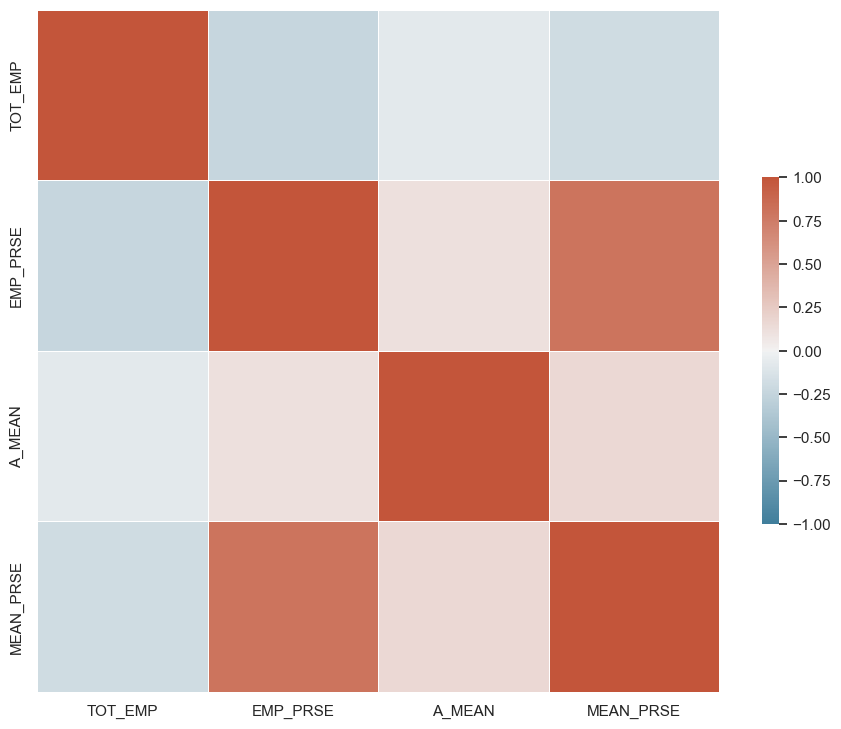

In [7]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show();

### Multivariable Pair Plot

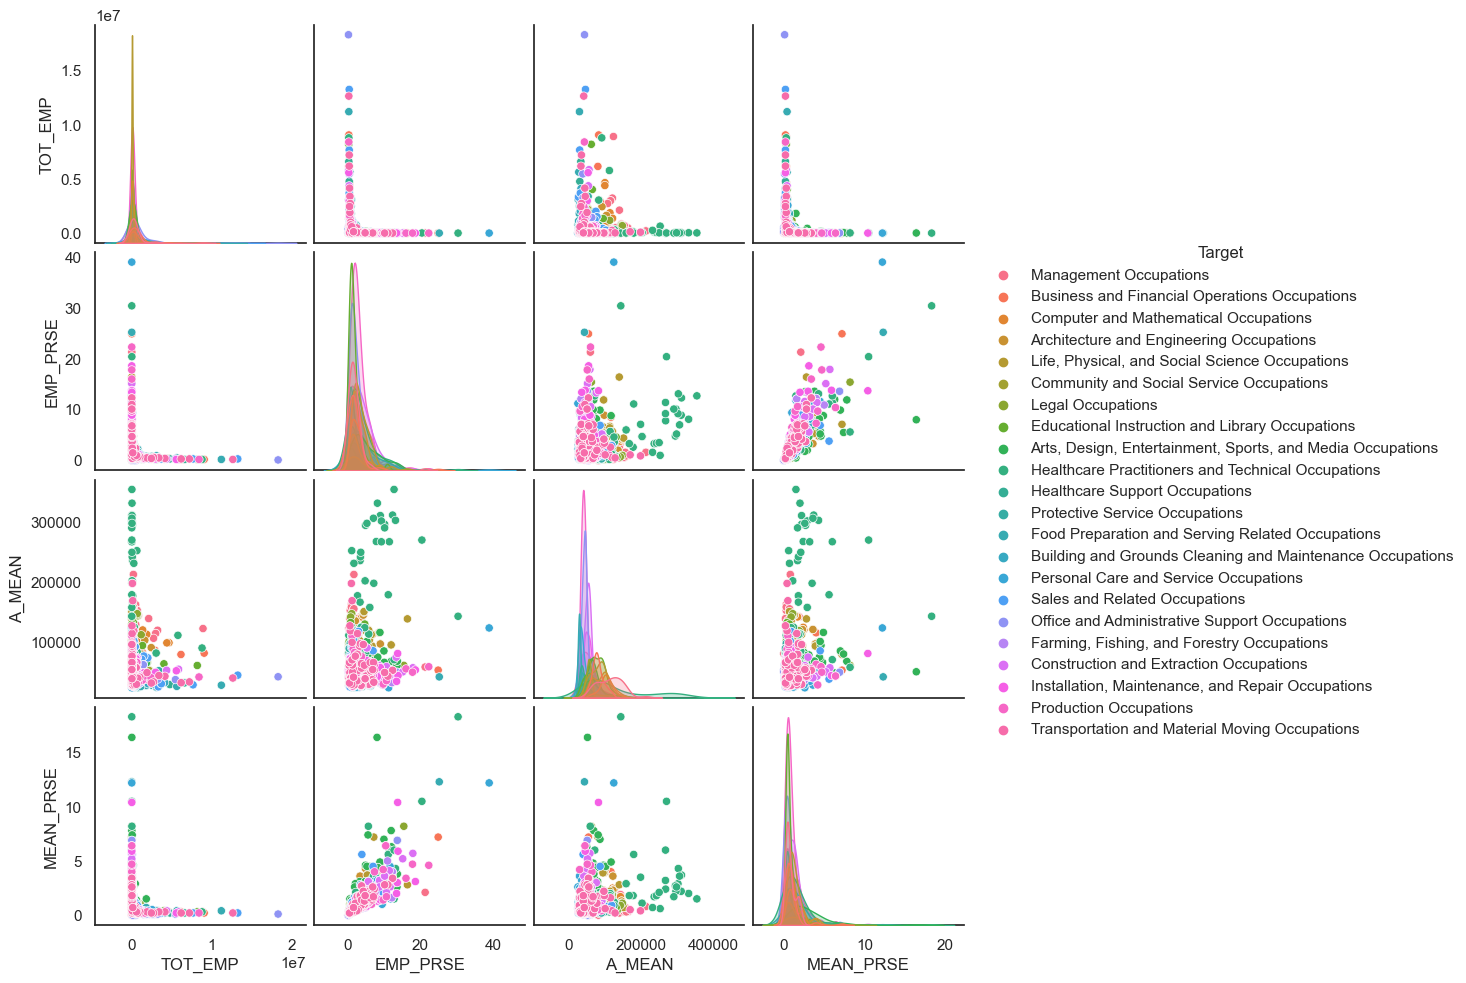

In [8]:
sns.pairplot(df.iloc[:, 2:7], hue='Target')
plt.show()

### Baseline: Random Classifier

In [9]:
from collections import Counter
from sklearn.metrics import precision_recall_fscore_support
def random_classifier(y_data):
    ypred=[];
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))

    print("-----RANDOM CLASSIFIER-----")
    print("count of prediction:",Counter(ypred).values()) # counts the elements' frequency
    print("probability of prediction:",np.fromiter(Counter(ypred).values(), dtype=float)/len(y_data)) # counts the elements' frequency
    print("accuracy",accuracy_score(y_data, ypred))
    print("precision, recall, fscore,",precision_recall_fscore_support(y_data, ypred))
random_classifier(Y)

-----RANDOM CLASSIFIER-----
count of prediction: dict_values([64, 64, 68, 73, 67, 63, 46, 56, 58, 44, 53, 62, 63, 51, 73, 54, 57, 60, 58, 54, 70, 69, 67])
probability of prediction: [0.04591105 0.04591105 0.04878049 0.05236729 0.04806313 0.04519369
 0.03299857 0.04017217 0.04160689 0.03156385 0.03802009 0.04447633
 0.04519369 0.03658537 0.05236729 0.03873745 0.04088953 0.04304161
 0.04160689 0.03873745 0.05021521 0.04949785 0.04806313]
accuracy 0.03299856527977044
precision, recall, fscore, (array([0.        , 0.04761905, 0.015625  , 0.01612903, 0.06896552,
       0.04109589, 0.01754386, 0.04477612, 0.04477612, 0.01851852,
       0.01886792, 0.        , 0.        , 0.01428571, 0.        ,
       0.05882353, 0.046875  , 0.06818182, 0.        , 0.05479452,
       0.        , 0.11764706, 0.07407407]), array([0.        , 0.04109589, 0.01724138, 0.02777778, 0.06557377,
       0.03797468, 0.03846154, 0.2       , 0.03092784, 0.01818182,
       0.00980392, 0.        , 0.        , 0.03030303, 0

c:\anaconda\envs\ANLY501\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Split Data

In [10]:
X.drop(columns=['EMP_PRSE'], inplace=True)

In [11]:
# PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_ratio, random_state=0, stratify=Y)

In [12]:
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)

<class 'pandas.core.frame.DataFrame'> (1115, 3)
<class 'pandas.core.series.Series'> (1115,)
<class 'pandas.core.frame.DataFrame'> (279, 3)
<class 'pandas.core.series.Series'> (279,)


### Train the Model

In [13]:
# TRAIN A SKLEARN RANDOM FOREST MODEL ON x_train,y_train 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model = model.fit(x_train, y_train)

### Check the Results

In [14]:
# USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

In [15]:
# GENERATES A CONFUSION MATRIX PLOT AND PRINTS MODEL PERFORMANCE METRICS
def confusion_plot(y_data, y_pred):    
    cm = confusion_matrix(y_data, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    
    print('ACCURACY:', accuracy_score(y_data, y_pred))
    print('RECALL:', recall_score(y_data, y_pred, average='weighted'))
    print('PRECISION:', precision_score(y_data, y_pred, average='weighted'))
    
    plt.show()


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

------TRAINING------
ACCURACY: 1.0
RECALL: 1.0
PRECISION: 1.0


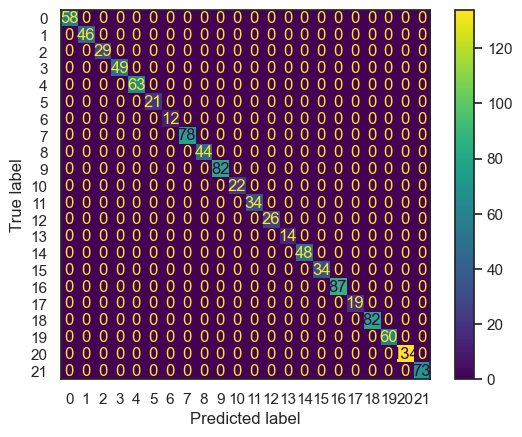

------TEST------
ACCURACY: 0.5519713261648745
RECALL: 0.5519713261648745
PRECISION: 0.5698341218528424


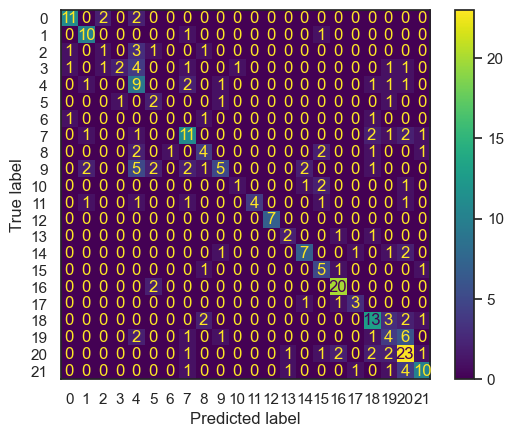

In [16]:
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

### Visualize the Tree

In [23]:
# VISUALIZE THE DECISION TREE
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

regr = RandomForestRegressor(random_state=1234, criterion='absolute_error')
model = regr.fit(x_train, y_train)


In [58]:
## ref: https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn
from sklearn import tree

def plot_tree(model, X, Y):
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(10,2), dpi=900)
    for index in range(0, 5):
        tree.plot_tree(model.estimators_[index], 
                    feature_names=X.columns,  
                    filled=True,
                    ax=ax[index])
        ax[index].set_title('Estimator: ' + str(index), fontsize=11)


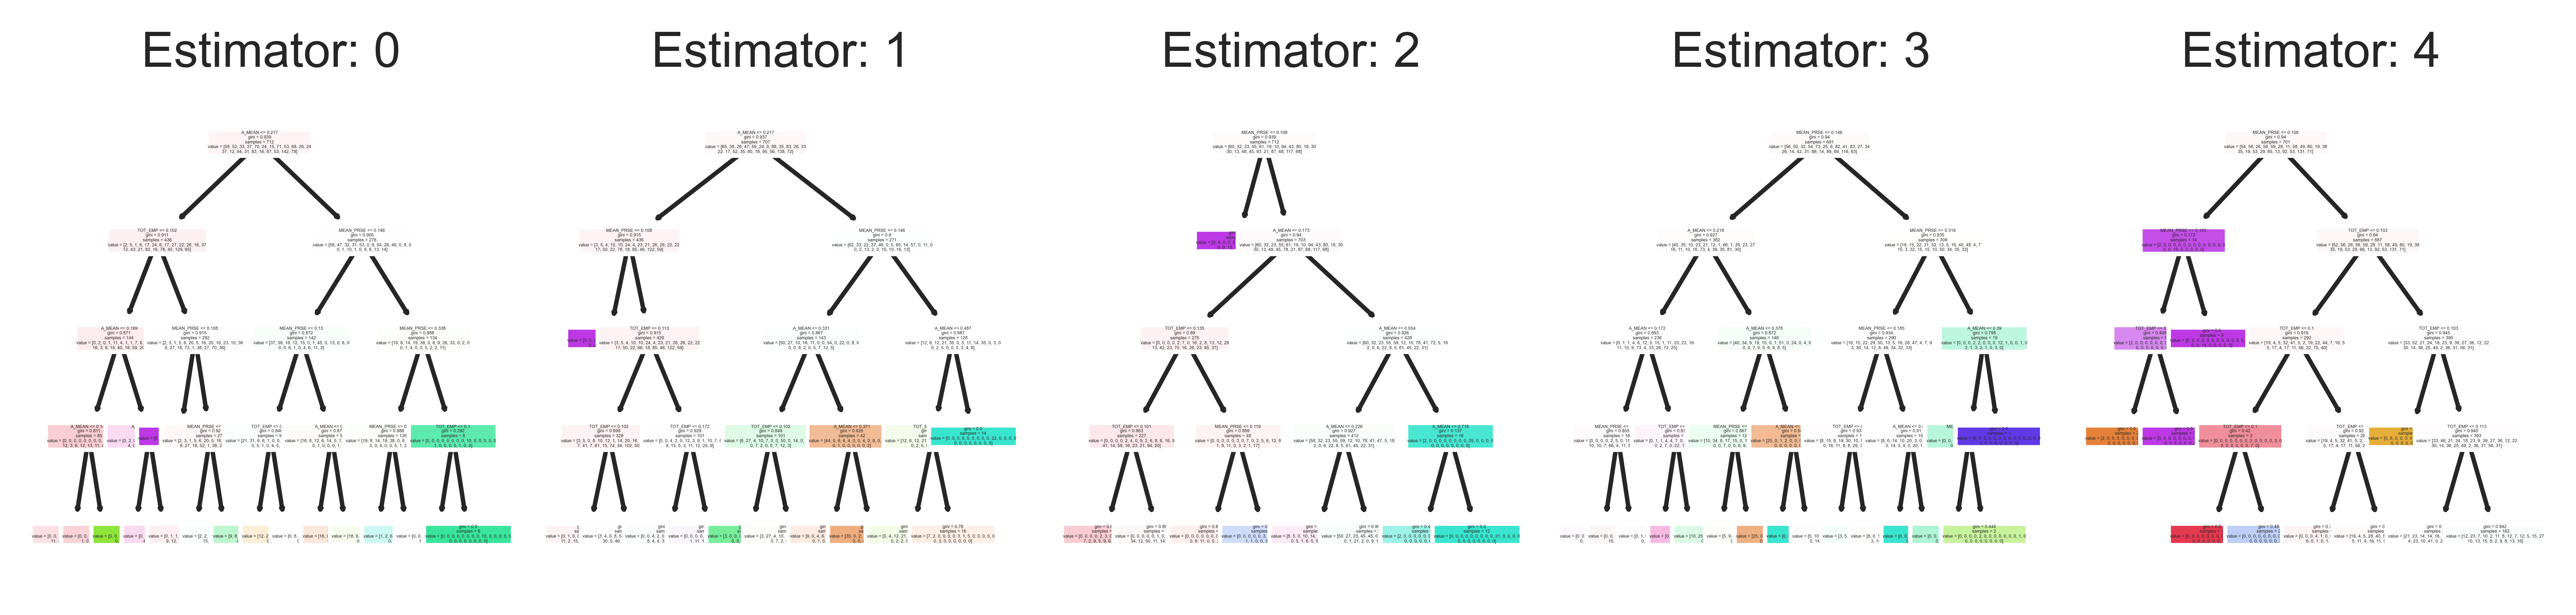

In [59]:
plot_tree(model, X, Y)

### Hyperparameter Tuning

In [25]:
# LOOP OVER POSSIBLE HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,51):
    model = RandomForestClassifier(max_depth=num_layer)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test, average='weighted')])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train, average='weighted')])

In [26]:
layers = [el[0] for el in test_results]
          
test_acc = [el[1] for el in test_results]
test_rec = [el[2] for el in test_results]

train_acc = [el[1] for el in train_results]
train_rec = [el[2] for el in train_results]

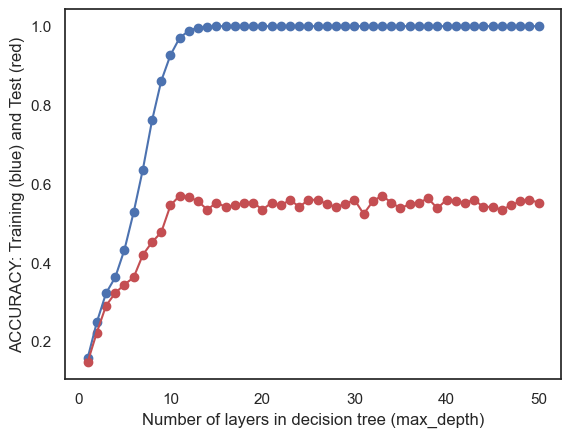

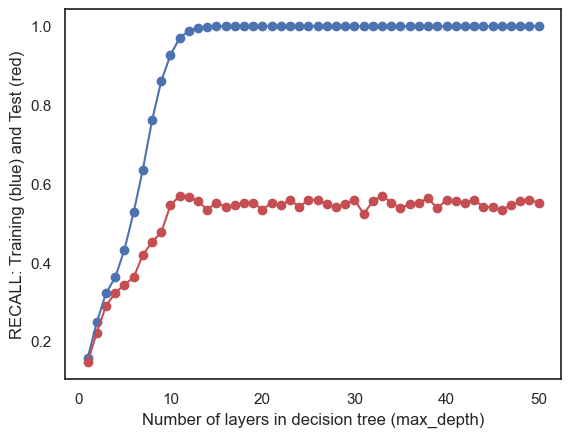

In [27]:
# GENERATE PLOTS TO IDENTIFY OPTIMAL HYPERPARAMETER
def gen_plots(x, train, test):
    plt.plot(x,train, c='b')
    plt.scatter(x,train,c='b')
    plt.plot(x,test,c='r')
    plt.scatter(x,test,c='r')
    plt.xlabel("Number of layers in decision tree (max_depth)")
    plt.show();

plt.ylabel("ACCURACY: Training (blue) and Test (red)")
gen_plots(layers, train_acc, test_acc)
plt.ylabel("RECALL: Training (blue) and Test (red)")
gen_plots(layers, train_rec, test_rec)

### Find Optimal Hyperparameter

In [24]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
hyper_param=[]
train_error=[]
test_error=[]
for i in range(1,23):
    # INITIALIZE MODEL 
    model = RandomForestRegressor(max_depth=i, criterion='absolute_error')

    # TRAIN MODEL 
    model.fit(x_train,y_train)

    # OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    # GET MAE
    err1=mean_absolute_error(y_train, yp_train) 
    err2=mean_absolute_error(y_test, yp_test) 

    hyper_param.append(i)
    train_error.append(err1)
    test_error.append(err2)

    print("hyperparam =",i)
    print(" train error:",err1)
    print(" test error:" ,err2)
    print(" error diff:" ,abs(err2-err1))

hyperparam = 1
 train error: 4.321295964125561
 test error: 4.32820788530466
 error diff: 0.00691192117909889
hyperparam = 2
 train error: 4.091219730941704
 test error: 4.139283154121864
 error diff: 0.048063423180160214
hyperparam = 3
 train error: 3.811201793721973
 test error: 3.9625985663082433
 error diff: 0.15139677258627016
hyperparam = 4
 train error: 3.5944618834080715
 test error: 3.827275985663082
 error diff: 0.23281410225501054
hyperparam = 5
 train error: 3.3958385650224217
 test error: 3.6982078853046594
 error diff: 0.30236932028223773
hyperparam = 6
 train error: 3.19004932735426
 test error: 3.5997311827956993
 error diff: 0.4096818554414394
hyperparam = 7
 train error: 2.964457399103139
 test error: 3.518530465949821
 error diff: 0.5540730668466822
hyperparam = 8
 train error: 2.79414798206278
 test error: 3.4552329749103943
 error diff: 0.6610849928476141
hyperparam = 9
 train error: 2.5676905829596417
 test error: 3.3761648745519715
 error diff: 0.8084742915923298

### Train Optimal Model

In [28]:
#### TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
model = RandomForestClassifier(max_depth=4)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

------TRAINING------
ACCURACY: 0.3650224215246637
RECALL: 0.3650224215246637
PRECISION: 0.4363740525026485


c:\anaconda\envs\ANLY501\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


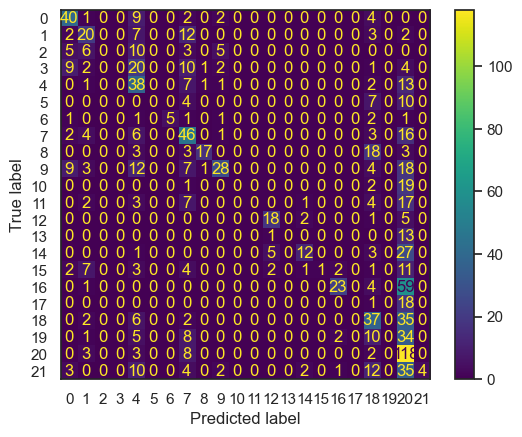

------TEST------
ACCURACY: 0.30824372759856633
RECALL: 0.30824372759856633
PRECISION: 0.357388052011708


c:\anaconda\envs\ANLY501\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


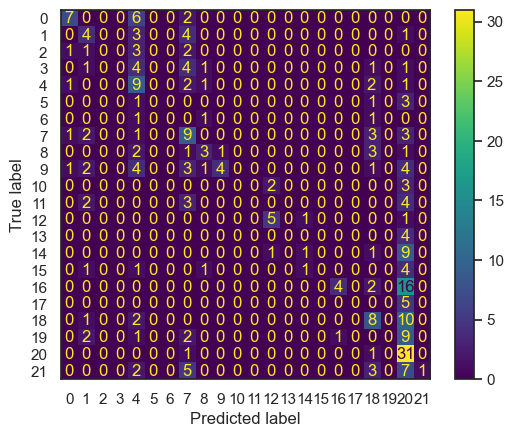

In [29]:
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

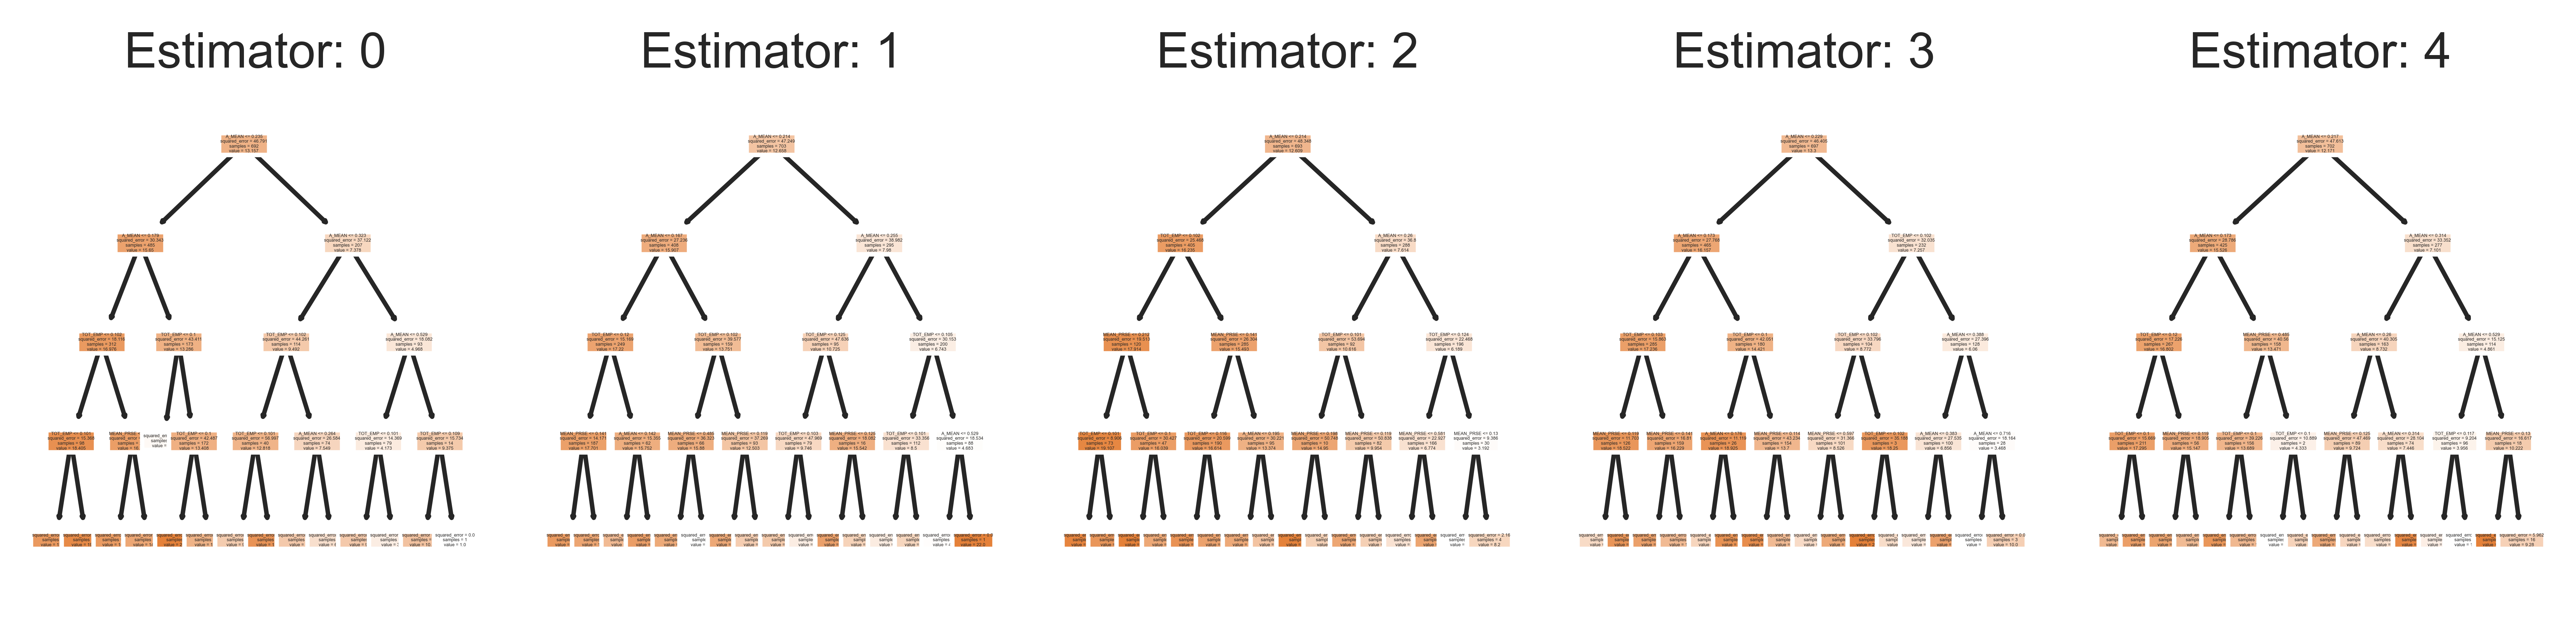

In [60]:
# VISUALIZE THE DECISION TREE
regr = RandomForestRegressor(random_state=1234, max_depth=4)
model = regr.fit(x_train, y_train)

plot_tree(model, X, Y)